<a href="https://colab.research.google.com/github/kjin2020/essay/blob/main/Master_Thesis_I_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
!mkdir train_local
drive.mount('/content/drive')
!unzip "/content/drive/My Drive/Colab Notebooks/master essay 2.zip" -d train_local

Mounted at /content/drive
Archive:  /content/drive/My Drive/Colab Notebooks/master essay 2.zip
   creating: train_local/master essay/
  inflating: train_local/master essay/Day-ahead_prices_201801010000_201912312359.xlsx  
  inflating: train_local/__MACOSX/master essay/._Day-ahead_prices_201801010000_201912312359.xlsx  
  inflating: train_local/master essay/Actual_generation_201801010000_201912312359.xlsx  
  inflating: train_local/__MACOSX/master essay/._Actual_generation_201801010000_201912312359.xlsx  


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_excel('train_local/master essay/Actual_generation_201801010000_201912312359.xlsx',header=None)
y=pd.read_excel('train_local/master essay/Day-ahead_prices_201801010000_201912312359.xlsx',header=None)

## Data Preprocessing

In [ ]:
df.columns,y.columns=df.iloc[0],y.iloc[1]
df,y=df.drop(0),y.drop([0,1])

In [ ]:
df=df.fillna(0)

In [ ]:
def to_datetime(d):
    return pd.to_datetime(d,format='%b %d, %Y %I:%M %p')
df['dayTime']=df['Date']+' '+df['Time of day']
df['dayTime']=df['dayTime'].apply(to_datetime)
df=df.iloc[:,2:].groupby([pd.Grouper(key='dayTime',freq='1H')]).sum()

In [ ]:
y['dayTime']=y['Date']+' '+y['Time of day']
y['dayTime']=y['dayTime'].apply(to_datetime)
y=y.fillna(0)

In [ ]:
a=y.iloc[:,[2,15,-1]].groupby([pd.Grouper(key='dayTime',freq='1H')]).sum()
a=a.replace(list(set([i for i in a.iloc[:,1].values if not isinstance(i, float) and not isinstance(i, int)])),0)
a['Price,Germany']=a.iloc[:,0]+a.iloc[:,1]

In [ ]:
df=pd.merge(df,a.iloc[:,2],on='dayTime',how='left')
df.head()

,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh],"Price,Germany"
dayTime,,,,,,,,,,,,,
2018-01-01 00:00:00,4779.25,1783.75,2917,28661,0,168,5853.75,6724.0,1712,2407,196,1119,-5.27
2018-01-01 01:00:00,4764.50,1676.25,3000,30106,0,168,4754.00,6810.0,1609,2407,632,1102,-29.99
2018-01-01 02:00:00,4766.75,1672.00,3096,30773,0,168,4591.00,6766.0,1684,2398,527,1057,-56.65
2018-01-01 03:00:00,4771.00,1658.25,3137,31642,0,168,4888.75,6728.0,1681,2416,55,1049,-63.14
2018-01-01 04:00:00,4776.50,1654.00,3212,31529,0,168,4696.50,6710.0,1677,2411,49,1079,-64.62


In [ ]:
#df['Total Production']=df.iloc[:,1:-2].sum(axis=1)
#data_pro=df.div(df['Total Production'].values,axis=0)
#data_pro.head()

,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh],"Price,Germany",Total Production
dayTime,,,,,,,,,,,,,,
2018-01-01 00:00:00,0.094784,0.035376,0.057851,0.568417,0.0,0.003332,0.116094,0.133353,0.033953,0.047737,0.003887,0.022192,-0.000105,1.0
2018-01-01 01:00:00,0.093125,0.032763,0.058637,0.588442,0.0,0.003284,0.092920,0.133106,0.031449,0.047046,0.012353,0.021539,-0.000586,1.0
2018-01-01 02:00:00,0.092245,0.032356,0.059913,0.595510,0.0,0.003251,0.088844,0.130934,0.032588,0.046405,0.010198,0.020455,-0.001096,1.0
2018-01-01 03:00:00,0.091095,0.031662,0.059896,0.604155,0.0,0.003208,0.093343,0.128461,0.032096,0.046130,0.001050,0.020029,-0.001206,1.0
2018-01-01 04:00:00,0.091668,0.031743,0.061643,0.605088,0.0,0.003224,0.090133,0.128775,0.032184,0.046271,0.000940,0.020708,-0.001240,1.0


In [ ]:
df['year']=df.index.year.astype(object)
df['month']=df.index.month.astype(object)
df['day']=df.index.day.astype(object)
df['hour']=df.index.hour.astype(object)

In [ ]:
df.head(24)

,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh],"Price,Germany",year,month,day,hour
dayTime,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,4779.25,1783.75,2917,28661,0,168,5853.75,6724.0,1712,2407,196,1119,-5.27,2018,1,1,0
2018-01-01 01:00:00,4764.50,1676.25,3000,30106,0,168,4754.00,6810.0,1609,2407,632,1102,-29.99,2018,1,1,1
2018-01-01 02:00:00,4766.75,1672.00,3096,30773,0,168,4591.00,6766.0,1684,2398,527,1057,-56.65,2018,1,1,2
2018-01-01 03:00:00,4771.00,1658.25,3137,31642,0,168,4888.75,6728.0,1681,2416,55,1049,-63.14,2018,1,1,3
2018-01-01 04:00:00,4776.50,1654.00,3212,31529,0,168,4696.50,6710.0,1677,2411,49,1079,-64.62,2018,1,1,4
2018-01-01 05:00:00,4768.75,1648.25,3282,32063,0,168,4830.75,6728.0,1682,2393,52,1100,-67.00,2018,1,1,5
2018-01-01 06:00:00,4781.00,1638.00,3291,31448,0,168,4762.50,6666.0,1690,2305,459,1091,-72.54,2018,1,1,6
2018-01-01 07:00:00,4793.75,1623.00,3282,30919,0,168,4639.00,6580.0,1679,2268,457,1092,-76.01,2018,1,1,7
2018-01-01 08:00:00,4810.00,1613.25,3285,30312,174,168,4616.25,6507.0,1509,2251,458,1088,-71.45,2018,1,1,8


In [ ]:
print(df.shape[0]==365*24*2)

True


## Causal inference

#### A simple double machine learning example (Partial Least Squares)

In [ ]:
!pip install -U DoubleML

     |████████████████████████████████| 116 kB 5.4 MB/s 


In [ ]:
import doubleml as dml
from doubleml import DoubleMLData
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cols=np.array(df.columns)

In [ ]:
features = [col for col in cols if col!='Hydropower[MWh]' and col!='Price,Germany' and col!='Total Production']

data = dml.DoubleMLData(df,
                                 y_col="Price,Germany",
                                 d_cols="Hydropower[MWh]",
                                 x_cols=features)
data

In [ ]:
forest = RandomForestRegressor(max_depth=5, min_samples_leaf=2)
dml = dml.DoubleMLPLR(data,
                                ml_g = forest,
                                ml_m = forest)

In [ ]:
dml.fit()

In [ ]:
dml.summary

,coef,std err,t,P>|t|,2.5 %,97.5 %
Hydropower[MWh],-0.000134,0.000398,-0.335755,0.737056,-0.000914,0.000647


#### Hourly-based treatment effects

In [ ]:
features = ['Biomass[MWh]',
            'Hydropower[MWh]',
            'Wind offshore[MWh]',
            'Wind onshore[MWh]',
            'Photovoltaics[MWh]',
            'Other renewable[MWh]',
            'Nuclear[MWh]',
            'Fossil brown coal[MWh]',
            'Fossil hard coal[MWh]',
            'Fossil gas[MWh]',
            'Hydro pumped storage[MWh]',
            'Other conventional[MWh]']

In [ ]:
import doubleml as dml
from doubleml import DoubleMLData
#To avoid the bug, one must import the packages twice.

In [ ]:
class TreatmentEffects:
    def __init__(self,data,features,y):
        self.features = features
        self.data     = data
        self.y        = y
   
    def DoubleML(self):
        n = len(self.features)
        d = {}
        
        forest1 = RandomForestRegressor(max_depth = 5, min_samples_leaf = 2)
        forest2 = RandomForestClassifier(max_depth = 5, min_samples_leaf = 2)
        for i in np.arange(24):
            print('round'+' '+str(i+1))
            dtf = self.data[self.data['hour'] == i].drop('hour', 1)
            d[str(i)+':00'] = {}
            for j in np.arange(n):
                f = [col for col in self.features if col != self.features[j]]
                data = dml.DoubleMLData(dtf,
                                 y_col  = self.y,
                                 d_cols = self.features[j],
                                 x_cols = f)
                
                if dtf[self.features[j]].dtype == 'uint8':
                    forest = forest2
                else:
                    forest = forest1
                    
                dbl = dml.DoubleMLPLR(data,
                                ml_g = forest1,
                                ml_m = forest)
                dbl.fit()
                d[str(i)+':00'][self.features[j]] = float(dbl.coef)
        self.coefs = d
    
    def fit(self):
        res = np.transpose(pd.DataFrame.from_dict(self.coefs))
        mse = {}
        self.data['predict'] = 0
        for i in np.arange(24):
            dtf = self.data[self.data['hour'] == i].drop(['hour',self.y,'predict'], 1)
            coef = res.iloc[i,:]
            self.data.loc[self.data['hour']==i,'predict'] = dtf@coef
            n = len(self.data.loc[self.data['hour']==i,'predict'])
            mse[str(i)+':00'] = (1/n) * sum((self.data.loc[self.data['hour']==i,'predict'] - self.data.loc[self.data['hour']==i,'Price,Germany'])**2)
        self.prediction = pd.DataFrame(self.data['predict'])
        self.mse_train = pd.DataFrame([mse])
        
##    def predict(self,test_data):
            
            
            
            

In [ ]:
result = TreatmentEffects(df.drop('Total Production',1),features,'Price,Germany')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
result.DoubleML()

round 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 13


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 16


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 17


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 18


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 19


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 21


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 22


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 23


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 24


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


In [ ]:
coef = np.transpose(pd.DataFrame.from_dict(result.coefs))
coef.head(24)

,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh]
0:00,-0.001144,-0.000952,-0.000119,-0.000596,-0.040684,-0.087821,0.001007,0.000221,0.001037,-0.000209,0.000679,0.000221
1:00,-0.002054,0.001503,0.000173,-0.000625,-0.105862,-0.071543,0.001308,0.000559,0.001156,-0.000073,-0.001297,0.001333
2:00,0.000064,0.001889,-0.000215,-0.000729,-0.192566,-0.065576,0.001459,0.001330,0.001008,0.000322,-0.007147,0.001687
3:00,-0.000185,0.000828,-0.000039,-0.000624,-0.027398,-0.079546,0.001376,0.000835,0.001072,0.000331,0.002311,0.001493
4:00,-0.001048,-0.000275,0.000157,-0.000572,0.108268,-0.092946,0.001007,0.000686,0.001073,0.000285,0.001051,0.001012
5:00,-0.001602,0.000573,0.000205,-0.000466,0.000951,-0.091036,0.001180,0.000903,0.001109,0.000229,-0.000694,0.001121
6:00,-0.005120,-0.000065,0.000147,-0.000271,0.000150,-0.087230,0.000988,0.000917,0.001312,0.000265,0.003056,0.001034
7:00,-0.003602,-0.001627,0.000222,-0.000320,0.000615,-0.124323,0.001395,0.000728,0.001652,0.000658,0.002597,0.001285
8:00,-0.001280,-0.000482,0.000200,-0.000313,0.000114,-0.153971,0.000868,0.000855,0.001810,0.001005,0.002629,0.001722
9:00,-0.002199,0.001185,-0.000098,-0.000404,-0.000119,-0.161630,0.001918,0.000693,0.001795,0.000883,0.002138,0.001194


In [ ]:
result.fit()

#### Predictions

In [ ]:
pred = result.prediction
pred.head(24)
# Daily profile for 2018-01-01

#### In-sample error

In [ ]:
np.transpose(result.mse_train)

,0
0:00,2225.742862
1:00,1388.410389
2:00,310.669951
3:00,681.756566
4:00,991.902099
5:00,834.063903
6:00,2835.129895
7:00,1548.912262
8:00,2244.223198
9:00,1805.206007


The training error is obviously too high

#### Estimate seasonal effects

In [ ]:
df_new = df.drop('Total Production',1)
df_new['year']=df_new.index.year.astype(object)
df_new['month']=df_new.index.month.astype(object)

In [ ]:
df_new = pd.concat([df_new[features+['hour','Price,Germany']],pd.get_dummies(df_new[['year','month']])],1)

In [ ]:
features_new = [element for element in list(df_new.columns) if element != 'hour' and element != 'Price,Germany']
result2 = TreatmentEffects(df_new,features_new,'Price,Germany')

In [ ]:
result2.DoubleML()

round 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 13


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 16


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 17


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 18


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 19


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 21


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 22


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 23


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


round 24


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


In [ ]:
result2.fit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
pred2 = result2.prediction
pred2.head(24)

,predict
dayTime,
2018-01-01 00:00:00,-26.021466
2018-01-01 01:00:00,-24.761477
2018-01-01 02:00:00,-5.718536
2018-01-01 03:00:00,-15.711965
2018-01-01 04:00:00,-29.442636
2018-01-01 05:00:00,-27.735411
2018-01-01 06:00:00,-31.035784
2018-01-01 07:00:00,-37.384714
2018-01-01 08:00:00,-40.900065


#### In sample error

In [ ]:
np.transpose(result2.mse_train)

#### Prediction

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
y = df['Price,Germany']
N = len(y)
res = np.fft.fft(y.values)

NameError: ignored

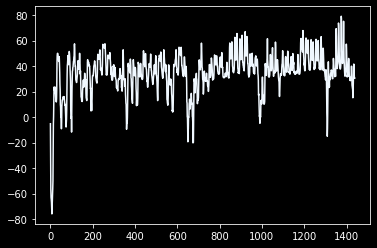

In [ ]:
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 5000         
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         
    x_notrend = x - p[0] * t       
    x_freqdom = np.fft.fft(x_notrend)
    f = np.fft.fftfreq(n)              
    indexes = list(range(n))
    indexes.sort(key=lambda i: np.absolute(f[i]))

    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n  
        phase = np.angle(x_freqdom[i])         
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t


if __name__ == "__main__":
    x = np.array(y)
    time = 60*24
    tm   = 0*24
    mid  = 45*24
    n_predict = 0
    prices = fourierExtrapolation(x, n_predict)
    residuals = x - prices
    plt.style.use('dark_background')
    plt.plot(np.arange(tm, time), x[tm:time], 'C0', label='real price', color='aliceblue')
#    plt.plot(np.arange(tm, time), prices[tm:time], 'C1', 
#            label='price approximation',color='aliceblue')
#    plt.plot(np.arange(0, time), residuals[0:time], 'C1', 
#            label='residuals',color='gold')
    plt.plot(np.arange(tm,mid), yhat[tm:mid], 'C2',
            label='train',color='salmon',linestyle='--')
#    plt.plot(np.arange(tm,mid), pred[:,-1][tm-24:], 'C2',
#            label='train',color='salmon',linestyle='--')
    plt.plot(np.arange(mid,time), yhat2[:time-mid], 'C2',
            label='test',color='deepskyblue',linestyle='--')
#    plt.plot(np.arange(mid,time), pred2[:,-1][:time-mid], 'C2',
#            label='test',color='deepskyblue',linestyle='--')
    plt.legend()
    plt.show()

In [ ]:
pred2[:-1].shape

(743, 13)

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
data = df
#data   = df.drop('Price,Germany',1)
#data["p"] = list(prices)
datat = data.drop(['day','hour','month','year','Price,Germany'],1)
scaled = scaler.fit_transform(datat)
n_hours = round(17520/24)
day     = 30
reframed = series_to_supervised(scaled, day*24, 1) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


NameError: ignored

In [ ]:
discharge = []
for i in range(1,day*24+1):
  string = 'var13(t-'+str(i)+')'
  discharge.append(string)


In [ ]:
reframed = reframed.drop(discharge, axis=1)

In [ ]:
#values = reframed.values
#n_train_hours = 365 * 24
#n_test_hours  = 31 * 24
#train = values[:n_train_hours, :]
#test = values[n_train_hours:(n_test_hours+n_train_hours), :]

In [ ]:
#train_X, train_y = train[:, :-1], train[:, -1]
#test_X, test_y = test[:, :-1], test[:, -1]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [ ]:
#model = keras.Sequential([
#    keras.layers.LSTM(128,'relu',return_sequences=True),
#    keras.layers.LSTM(1024,'relu',return_sequences=True),
#    keras.layers.LSTM(1024,'relu',return_sequences=True),
#    keras.layers.LSTM(128,'relu',return_sequences=True),
#    keras.layers.Dense(1,'linear')
#])
#opt = keras.optimizers.Adam(learning_rate=0.001,amsgrad=True)
#model.compile(optimizer=opt,
              loss='mse')

In [ ]:
#history = model.fit(train_X, train_y, epochs=200, batch_size=32, validation_data=(test_X, test_y), verbose=1)

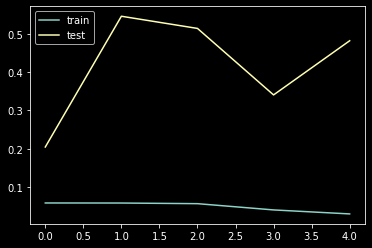

In [ ]:
#plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
#plt.legend()
#plt.show()
 

In [ ]:
#yhat = model.predict(train_X)
#test.shape

(744, 8653)

In [ ]:
#yh     = yhat.reshape((yhat.shape[0], yhat.shape[2]))
#inv_yhat = np.concatenate((scaled[:n_train_hours, :-1],yh), axis=1)

In [ ]:
#pred = scaler.inverse_transform(inv_yhat)

In [ ]:
#yhat2 = model.predict(test_X)
#yh2     = yhat2.reshape((yhat2.shape[0], yhat2.shape[2]))
#inv_yhat2 = np.concatenate((scaled[n_train_hours:(n_train_hours+n_test_hours), :-1],yh2), axis=1)

In [ ]:
#pred2 = scaler.inverse_transform(inv_yhat2)

In [ ]:
data2 = pd.concat([data.drop(['day','hour','month','year'],1),pd.get_dummies(data[['day','hour','month','year']])],1)
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
model = keras.Sequential([
#    keras.layers.Normalization(),
    keras.layers.Dense(128,'relu'),
    keras.layers.Dense(1024,'relu'),
    keras.layers.Dense(1024,'relu'),
    keras.layers.Dense(128,'relu'),
    keras.layers.Dense(1,'linear')
])
opt = keras.optimizers.Adam(learning_rate=0.001,amsgrad=True)
model.compile(optimizer=opt,
              loss='mse')
#X = data2.drop('p',1)
#y = data2['p']
X = data2.drop('Price,Germany',1)
y = data2['Price,Germany']
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
train_X,train_y=X[:mid,:],y[:mid]
test_X,test_y=X[mid:time,:],y[mid:time]
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,mode='auto')

In [ ]:
history = model.fit(train_X, train_y, epochs=200, batch_size=32, verbose=1,validation_data=(test_X,test_y))

Epoch 1/5
275/275 [==============================] - 6s 20ms/step - loss: 142681.5156 - val_loss: 82.3452
Epoch 2/5
 62/275 [=====>........................] - ETA: 3s - loss: 124.9149

KeyboardInterrupt: ignored

In [ ]:
history.history['val_loss'][-1]

93.6063232421875

In [ ]:
yhat = model.predict(train_X)
yhat2 = model.predict(test_X)

#### Variable selection

In [ ]:
def combinations(l):
    res = [[]]
    for i in l:
      res = res + [c + [i] for c in res]
    return res

In [ ]:
variables = data.drop(['day','hour','month','year','Price,Germany'],1).columns
conventional = list(variables[6:])
var_sel   = combinations(conventional)
len(var_sel)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


4096

In [ ]:
val_loss = {}
p = data2['Price,Germany']
data2 = data2.drop('Price,Germany',1)
for i in np.arange(len(var_sel)):
  model = keras.Sequential([
                            keras.layers.Dense(128,'relu'),
                            keras.layers.Dense(1024,'relu'),
                            keras.layers.Dense(1024,'relu'),
                            keras.layers.Dense(128,'relu'),
                            keras.layers.Dense(1,'linear')
                            ])
  opt = keras.optimizers.Adam(learning_rate=0.001,amsgrad=True)
  model.compile(optimizer=opt,loss='mse')
  X = data2.drop(var_sel[i],1)
  y = p
  X = np.asarray(X).astype(np.float32)
  y = np.asarray(y).astype(np.float32)
  train_X,train_y=X[:mid,:],y[:mid]
  test_X,test_y=X[mid:time,:],y[mid:time]
  history = model.fit(train_X, train_y, epochs=200, batch_size=32, verbose=1,validation_data=(test_X,test_y))
  val_loss[i] = np.mean(history.history['val_loss'][-10:])


Epoch 1/200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Streaming output truncated to the last 5000 lines.
34/34 [==============================] - 0s 5ms/step - loss: 61.7931 - val_loss: 180.7630
Epoch 102/200
34/34 [==============================] - 0s 6ms/step - loss: 57.2909 - val_loss: 255.4652
Epoch 103/200
34/34 [==============================] - 0s 6ms/step - loss: 65.2791 - val_loss: 230.8767
Epoch 104/200
34/34 [==============================] - 0s 5ms/step - loss: 53.5611 - val_loss: 207.8014
Epoch 105/200
34/34 [==============================] - 0s 7ms/step - loss: 95.2156 - val_loss: 174.6569
Epoch 106/200
34/34 [==============================] - 0s 6ms/step - loss: 61.5026 - val_loss: 225.7670
Epoch 107/200
34/34 [==============================] - 0s 6ms/step - loss: 122.3269 - val_loss: 175.1073
Epoch 108/200
34/34 [==============================] - 0s 5ms/step - loss: 101.8422 - val_loss: 184.5586
Epoch 109/200
34/34 [==============================] - 0s 6ms/step - loss: 135.8804 - val_loss: 203.8215
Epoch 110/200
34/34 [===

In [ ]:
min(val_loss,key=val_loss.get)

45

In [ ]:
var_sel[45]

['Nuclear[MWh]',
 'Fossil hard coal[MWh]',
 'Fossil gas[MWh]',
 'Other conventional[MWh]']